<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-1">TF-IDF</a></span></li><li><span><a href="#In-86-start-here" data-toc-modified-id="In-86-start-here-2">In 86 start here</a></span></li><li><span><a href="#Word2Vec" data-toc-modified-id="Word2Vec-3">Word2Vec</a></span></li><li><span><a href="#Doc2Vec" data-toc-modified-id="Doc2Vec-4">Doc2Vec</a></span></li><li><span><a href="#In-86-start-here-for-doc2vec" data-toc-modified-id="In-86-start-here-for-doc2vec-5">In 86 start here for doc2vec</a></span><ul class="toc-item"><li><span><a href="#Splitting-the-data" data-toc-modified-id="Splitting-the-data-5.1">Splitting the data</a></span></li></ul></li><li><span><a href="#Training-Logistic-Regression" data-toc-modified-id="Training-Logistic-Regression-6">Training Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Training-SVC" data-toc-modified-id="Training-SVC-6.1">Training SVC</a></span></li><li><span><a href="#Training-DescisionTree" data-toc-modified-id="Training-DescisionTree-6.2">Training DescisionTree</a></span></li><li><span><a href="#Training-RandomForest" data-toc-modified-id="Training-RandomForest-6.3">Training RandomForest</a></span></li><li><span><a href="#Training-Multilayer-Perceptron" data-toc-modified-id="Training-Multilayer-Perceptron-6.4">Training Multilayer Perceptron</a></span></li><li><span><a href="#Training-Gradient-Boosting" data-toc-modified-id="Training-Gradient-Boosting-6.5">Training Gradient Boosting</a></span></li></ul></li><li><span><a href="#Training-Naive-Bayes" data-toc-modified-id="Training-Naive-Bayes-7">Training Naive Bayes</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [77]:
df = pd.read_csv("/home/coea/Hatespeech/labeled_data.csv")

In [78]:
df = df.drop('Unnamed: 0',axis=1 )

In [5]:
df.head(3)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...


In [6]:
df.columns

Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')

In [7]:
df.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [8]:
df.groupby("class").describe()

count                                              hate_speech  \
         count      mean       std  min  25%  50%  75%  max       count   
class                                                                     
0       1430.0  3.108392  0.648084  3.0  3.0  3.0  3.0  9.0      1430.0   
1      19190.0  3.268890  0.923024  3.0  3.0  3.0  3.0  9.0     19190.0   
2       4163.0  3.172712  0.746097  3.0  3.0  3.0  3.0  9.0      4163.0   

                ...  neither      offensive_language                           \
           mean ...      75%  max              count      mean       std  min   
class           ...                                                             
0      2.256643 ...      0.0  4.0             1430.0  0.755944  0.487653  0.0   
1      0.180459 ...      0.0  3.0            19190.0  3.003544  0.954097  2.0   
2      0.062935 ...      3.0  9.0             4163.0  0.264233  0.461737  0.0   

                           
       25%  50%  75%  max  
class                      
0      0.0  1.0  1.0  4.0  
1      3.0  3.0  3.0  9.0  
2      0.0  0.0  1.0  4.0  

[3 rows x 32 columns]

In [9]:
#df.groupby("class").describe()["class"==0]
sum(df["class"]==0)

1430

In [10]:
df["class"].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [11]:
def percentage_class(idx):
    Percentage = 100 * float(sum(df["class"]==idx))/float(len(df["class"]))
    return Percentage


In [12]:
print("the percenatge of '0' class", percentage_class(0))
print("the percenatge of '1' class", percentage_class(1))
print("the percenatge of '2' class", percentage_class(2))

the percenatge of '0' class 5.770084332001775
the percenatge of '1' class 77.43211072105879
the percenatge of '2' class 16.797804946939433


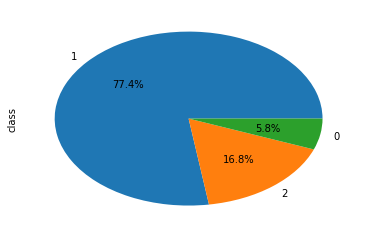

In [13]:
#ploting percentage of each class
df["class"].value_counts().plot(kind='pie',autopct='%1.1f%%')

Finding out the Maximum length tweet



In [14]:
df['length'] = df['tweet'].apply(len)
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


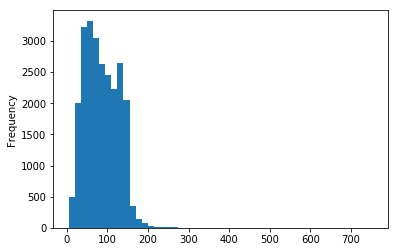

In [15]:
df['length'].plot(bins=50, kind='hist')

#Feature generation

Here copying the data from **df** to **dataF** and creating new variable with same data

In [16]:
#copying data from original variable to another varible.

dataF = df.copy()

In [17]:
#Viewing top 3 rows in the data set

dataF.head(3)

,count,hate_speech,offensive_language,neither,class,tweet,length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120


In [18]:
dataF.head(5)

,count,hate_speech,offensive_language,neither,class,tweet,length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


In [10]:
# Cleaning the texts
import re
import nltk
from nltk.corpus import stopwords            ## it will check stop words present in data
from nltk.stem.porter import PorterStemmer   ## it will use for stemmming the words
from nltk.stem import WordNetLemmatizer
from nltk.tag import StanfordPOSTagger

In [52]:
# !pip install contractions

In [53]:
import contractions
def con(words):
    return [contractions.fix(word) for word in words.split()]    #For expanding Contractions

ImportError: No module named 'contractions'

In [54]:
# dataF['Contractions']=dataF['tweet'].apply(lambda x: con(x))

In [55]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


In [56]:
#!pip install TextBlob
#from textblob import TextBlob

In [57]:
#!pip install gingerit

In [58]:
#from gingerit.gingerit import GingerIt
#parser = GingerIt()
#tweet=parser.parse(dataF['tweet'][23])
#tweet

In [59]:
#blob=TextBlob(dataF['tweet'][23])
#blob.correct()

In [60]:
# Expanding whatsapp language slangs

import csv
import re

def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        fileName = "./HateSpeechNew/PreProcessing/sms_slang_translator-master/slang.txt"
        # File Access mode [Read Mode]
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if str(_str).upper() == row[0]:
                    # If match found replace it with its appropriate phrase in text file.
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    # Replacing commas with spaces for final output.
    return ' '.join(user_string)

In [61]:
dataF['ExpandedSlangs']=dataF['tweet'].apply(lambda x: translator(x)) 

In [62]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [63]:
dataF['Preprocessed_Initial']=dataF['ExpandedSlangs'].apply(lambda x: con(x)) #Contractions for expanded slangs

NameError: name 'con' is not defined

In [64]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [65]:
import nltk
#nltk.download('stopwords')

In [66]:
import nltk
#nltk.download('wordnet')

In [67]:
import nltk
#nltk.download('punkt')

In [68]:
# Preprocessing the tweets.

import nltk
from nltk.tokenize import RegexpTokenizer,word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
 
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    #for text in sentence:
    #  if text in ['html','www','http','https','rt']:
    #sentence= [sentence.replace(w,'') for w in sentence if w in ['html','www','http','https','rt']]
    sentence=sentence.replace('rt',"")
    sentence=sentence.replace('www',"")
    sentence=sentence.replace('http',"")
    sentence=sentence.replace('https',"")
    sentence=sentence.replace('html',"")
    sentence=sentence.replace('*',"")
    sentence=sentence.replace('#',"")
    cleanr = re.compile('<.?>')
    cleantext1 = re.sub(cleanr, '', sentence)
    cleantext = re.sub('@[^\s]+','',cleantext1)
    #rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', cleantext)
    tokenizer = RegexpTokenizer(r'\w+')
    #tokenizer = RegexpTokenizer("[\w']+")
    tokens = tokenizer.tokenize(rem_num)
    #tokens = word_tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2] # if not w in stopwords.words('english')]
    #stem_words=[stemmer.stem(w) for w in filtered_words]
    #lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)

In [69]:
dataF['PreprocessedTweet']=dataF['Preprocessed_Initial'].map(lambda s:preprocess(s))
#dataF['tweet_prepro'] = dataF['tweet'].apply(lambda x: preprocess(x))
#dataF['tweet_prepro'].tail()

KeyError: 'Preprocessed_Initial'

In [70]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
def tokenize(text):
    tokens = re.split(" ",text) 
    return tokens

In [ ]:
dataF['final_tweet_tokens'] = dataF['PreprocessedTweet'].apply(lambda x: tokenize(x))

In [ ]:
dataF.head()

In [ ]:
dataF['PreprocessedTweet'].head()

In [ ]:
#!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
word_c = WordCloud(collocations=False,background_color='white',mode='RGB',scale=4).generate(str(dataF['PreprocessedTweet']))
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,8),facecolor='w')
plt.imshow(word_c);

In [ ]:
def lemmatizing(words):
    lemmatizer =WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

In [ ]:
dataF['LemmaWords']=dataF['final_tweet_tokens'].apply(lambda x: lemmatizing(x))

In [ ]:
dataF.head()

In [ ]:
dataF['LemmaWords']

In [ ]:
dataF.to_csv('Hate_spech_preprocessed.csv', index=False)

In [ ]:
# !pip install keras

In [ ]:
# !pip install tensorflow

In [ ]:
from keras.preprocessing.text import text_to_word_sequence

In [ ]:
dataF['KerasTokens']=dataF['PreprocessedTweet'].apply(text_to_word_sequence)

In [ ]:
dataF.head()

In [ ]:
from wordcloud import WordCloud
word_c = WordCloud(collocations=False,background_color='white',mode='RGB',scale=4).generate(str(dataF['LemmaWords']))
import matplotlib.pyplot as plt 
plt.figure(figsize=(18,8),facecolor='w')
plt.imshow(word_c);

In [ ]:
dataF['Lemma_Preprocessed']=dataF['LemmaWords'].map(lambda s:preprocess(s))

In [ ]:
dataF.head()

In [9]:
dataF = pd.read_csv("/home/coea/Hatespeech/preprocessing/Hate_spech_preprocessed.csv")

In [10]:
dataF.head()

,count,hate_speech,offensive_language,neither,class,tweet,length,ExpandedSlangs,Preprocessed_Initial,PreprocessedTweet,final_tweet_tokens,LemmaWords
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,!!! RT @mayasolovely: As a woman you shouldn't...,"['!!!', 'RT', '@mayasolovely:', 'As', 'a', 'wo...",woman you should not complain about cleaning y...,"['woman', 'you', 'should', 'not', 'complain', ...","['woman', 'you', 'should', 'not', 'complain', ..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,!!!!! RT @mleew17: boy Thats cold...tyga Down ...,"['!!!!!', 'RT', '@mleew17:', 'boy', 'That Is',...",boy that cold tyga down bad for cuffin that ho...,"['boy', 'that', 'cold', 'tyga', 'down', 'bad',...","['boy', 'that', 'cold', 'tyga', 'down', 'bad',..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,!!!!!!! RT @UrKindOfBrand Dog RT @80sbaby4life...,"['!!!!!!!', 'RT', '@UrKindOfBrand', 'Dog', 'RT...",dog you ever fuck bitch and she sta cry you co...,"['dog', 'you', 'ever', 'fuck', 'bitch', 'and',...","['dog', 'you', 'ever', 'fuck', 'bitch', 'and',..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"['!!!!!!!!!', 'RT', '@C_G_Anderson:', '@viva_b...",she look like tranny,"['she', 'look', 'like', 'tranny']","['she', 'look', 'like', 'tranny']"
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"['!!!!!!!!!!!!!', 'RT', '@ShenikaRoberts:', 'T...",the shit you hear about might true might faker...,"['the', 'shit', 'you', 'hear', 'about', 'might...","['the', 'shit', 'you', 'hear', 'about', 'might..."


In [13]:
#!pip install gensim

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

# TF-IDF

In [27]:
tfidf_vectorizer = TfidfVectorizer(min_df=50, max_features=1000, stop_words=None,tokenizer=tokenize,analyzer='word')
tfidf = tfidf_vectorizer.fit_transform(dataF['PreprocessedTweet'].values.astype('U'))
tfidf.shape

(24783, 590)

# In 86 start here

In [19]:
tfidf_df = pd.read_csv('/home/coea/Hatespeech/TF-IDF/TF-IDF.csv')

In [20]:
# tfidf_df = pd.DataFrame(tfidf_df.toarray())

In [21]:
tfidf_df = tfidf_df.values

In [22]:
tfidf_df.shape

(24783, 589)

# Word2Vec

In [75]:
%%time

tokenized_tweet = dataF['Lemma_Preprocessed'].apply(lambda x: x.split()) # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=500, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(dataF['Lemma_Preprocessed']), epochs=20)

CPU times: user 3min 33s, sys: 1.06 s, total: 3min 34s
Wall time: 17 s


(3628394, 5058200)

In [76]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [77]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 500)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 500 )
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(24783, 500)

# Doc2Vec

In [78]:
#!pip install --upgrade pandas==0.25.0

In [79]:
!pip install tqdm

In [81]:
from tqdm import tqdm 
#tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument

ImportError: cannot import name 'LabeledSentence' from 'gensim.models.doc2vec' (/home/dstuser/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py)

# In 86 start here for doc2vec

In [17]:
docvec_df = pd.read_csv('/home/coea/Hatespeech/Doc2Vec_Vectors.csv')

In [48]:
docvec_df.shape

(24783, 500)

## Splitting the data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(docvec_df.values, dataF['class'].values, \
                                                    stratify = dataF['class'].values,shuffle = True,\
                                                    random_state=1,test_size=0.2)

In [25]:
#importing necessary librarys machine learning algorthms

from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# PNN algorithm not imported
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


#importing all necessary metrics
from sklearn.metrics import *


# Training Logistic Regression

In [26]:
technique='doc2vec'

In [27]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]

    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
    
    LR_model = LogisticRegression(random_state=1,C=100)
    
    # define gridsearch CV
    p_grid = {'penalty': ['l1', 'l2']}
    
    clf = GridSearchCV(estimator = LR_model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=-1)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


Fold: 1, acc=0.820, Val_Acc: 0.810, est=0.816, cfg={'penalty': 'l2'}
Test_micro_f1: 0.8198507161589671
Test_macro_f1: 0.5458334236988572
Fold: 2, acc=0.819, Val_Acc: 0.811, est=0.816, cfg={'penalty': 'l2'}
Test_micro_f1: 0.8194472463183377
Test_macro_f1: 0.5421722529870906
Fold: 3, acc=0.820, Val_Acc: 0.815, est=0.816, cfg={'penalty': 'l2'}
Test_micro_f1: 0.8198507161589671
Test_macro_f1: 0.5432251659150499
Fold: 4, acc=0.820, Val_Acc: 0.821, est=0.816, cfg={'penalty': 'l2'}
Test_micro_f1: 0.8196489812386523
Test_macro_f1: 0.5386014898853168
Fold: 5, acc=0.818, Val_Acc: 0.812, est=0.815, cfg={'penalty': 'l2'}
Test_micro_f1: 0.8184385717167642
Test_macro_f1: 0.5405685466958511
Fold: 6, acc=0.821, Val_Acc: 0.816, est=0.815, cfg={'penalty': 'l2'}
Test_micro_f1: 0.8208593907605406
Test_macro_f1: 0.5479771043213321
Fold: 7, acc=0.820, Val_Acc: 0.819, est=0.816, cfg={'penalty': 'l2'}
Test_micro_f1: 0.8202541859995965
Test_macro_f1: 0.5377576664537073
Fold: 8, acc=0.819, Val_Acc: 0.811, est=0

In [29]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV vali_accuracy: 0.816 +/- 0.005

CV accuracy: 0.820 +/- 0.001

CV micro F1: 0.820 +/- 0.001

CV macro F1: 0.542 +/- 0.003

---------------------- CLASS : Hate speech Metrics ------------------------

CV Class : Hate speech precision: 0.515 +/- 0.010

CV Class : Hate speech Recall: 0.112 +/- 0.007

CV Class : Hate speech F1 score: 0.184 +/- 0.009

CV Class : Hate speech Support: 286.000 +/- 0.000

---------------------- CLASS : Offensive language Metrics ------------------------

CV Class : Offensive language precision: 0.844 +/- 0.001

CV Class : Offensive language Recall: 0.949 +/- 0.001

CV Class : Offensive language F1 score: 0.893 +/- 0.001

CV Class : Offensive language Support: 3838.000 +/- 0.000

---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.672 +/- 0.005

CV Class : Neither Recall: 0.465 +/- 0.006

CV Class : Neither F1 score: 0.550 +/- 0.003

CV Class : Neither Support: 833.000 +/- 0.000


In [30]:
model="LR.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

doc2vec_LR.csv
(10, 15)


,accuracy,microF1,macro F1,Hate speech-Precision,Hate speech-Recall,Hate speech-F1score,Hate speech-Support,Offensive language-Precision,Offensive language-Recall,Offensive language-F1score,Offensive language-Support,Neither-Precision,Neither-Recall,Neither-F1score,Neither-Support
0,0.819851,0.819851,0.545833,0.523077,0.118881,0.193732,286.0,0.844032,0.948932,0.893413,3838.0,0.844032,0.465786,0.550355,833.0
1,0.819447,0.819447,0.542172,0.533333,0.111888,0.184971,286.0,0.844228,0.948932,0.893523,3838.0,0.844228,0.465786,0.548023,833.0
2,0.819851,0.819851,0.543225,0.515625,0.115385,0.188571,286.0,0.843078,0.950495,0.893570,3838.0,0.843078,0.459784,0.547534,833.0
3,0.819649,0.819649,0.538601,0.500000,0.104895,0.173410,286.0,0.843078,0.950495,0.893570,3838.0,0.843078,0.462185,0.548824,833.0
4,0.818439,0.818439,0.540569,0.516129,0.111888,0.183908,286.0,0.843019,0.948671,0.892730,3838.0,0.843019,0.460984,0.545067,833.0


## Training SVC

In [49]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
        
    # define gridsearch CV
    model = SVC(random_state=42,max_iter=-1)
    param_range = [0.1,0.5,1.0,1.5,2.0,2.5,3.0]
    
    p_grid =  {'C': param_range, 
               #'loss':['hinge', 'squared_hinge'],
               'kernel':['linear','poly', 'rbf', 'sigmoid']
               }   
    
    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=-1)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


Fold: 1, acc=0.901, Val_Acc: 0.899, est=0.898, cfg={'C': 1.5, 'kernel': 'linear'}
Test_micro_f1: 0.9011498890457939
Test_macro_f1: 0.668201953997292
Fold: 2, acc=0.901, Val_Acc: 0.897, est=0.899, cfg={'C': 1.0, 'kernel': 'linear'}
Test_micro_f1: 0.9005446842848497
Test_macro_f1: 0.6530421797297578
Fold: 3, acc=0.901, Val_Acc: 0.903, est=0.899, cfg={'C': 2.0, 'kernel': 'linear'}
Test_micro_f1: 0.9011498890457939
Test_macro_f1: 0.676610513609346
Fold: 4, acc=0.900, Val_Acc: 0.900, est=0.899, cfg={'C': 1.0, 'kernel': 'linear'}
Test_micro_f1: 0.8999394795239056
Test_macro_f1: 0.6647199093626323
Fold: 5, acc=0.900, Val_Acc: 0.896, est=0.899, cfg={'C': 2.0, 'kernel': 'linear'}
Test_micro_f1: 0.9001412144442204
Test_macro_f1: 0.662273233100421
Fold: 6, acc=0.901, Val_Acc: 0.901, est=0.899, cfg={'C': 1.0, 'kernel': 'linear'}
Test_micro_f1: 0.9007464192051644
Test_macro_f1: 0.6630573950097846
Fold: 7, acc=0.902, Val_Acc: 0.897, est=0.900, cfg={'C': 2.0, 'kernel': 'linear'}
Test_micro_f1: 0.9021

In [50]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV vali_accuracy: 0.900 +/- 0.004

CV accuracy: 0.901 +/- 0.001

CV micro F1: 0.901 +/- 0.001

CV macro F1: 0.666 +/- 0.006

---------------------- CLASS : Hate speech Metrics ------------------------

CV Class : Hate speech precision: 0.487 +/- 0.032

CV Class : Hate speech Recall: 0.123 +/- 0.013

CV Class : Hate speech F1 score: 0.196 +/- 0.018

CV Class : Hate speech Support: 286.000 +/- 0.000

---------------------- CLASS : Offensive language Metrics ------------------------

CV Class : Offensive language precision: 0.935 +/- 0.001

CV Class : Offensive language Recall: 0.951 +/- 0.001

CV Class : Offensive language F1 score: 0.943 +/- 0.000

CV Class : Offensive language Support: 3838.000 +/- 0.000

---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.795 +/- 0.004

CV Class : Neither Recall: 0.934 +/- 0.003

CV Class : Neither F1 score: 0.859 +/- 0.002

CV Class : Neither Support: 833.000 +/- 0.000


In [51]:
model="SVM.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

TF-IDF_SVM.csv
(10, 15)


,accuracy,microF1,macro F1,Hate speech-Precision,Hate speech-Recall,Hate speech-F1score,Hate speech-Support,Offensive language-Precision,Offensive language-Recall,Offensive language-F1score,Offensive language-Support,Neither-Precision,Neither-Recall,Neither-F1score,Neither-Support
0,0.901150,0.901150,0.668202,0.493151,0.125874,0.200557,286.0,0.934271,0.951798,0.942953,3838.0,0.934271,0.933974,0.861096,833.0
1,0.900545,0.900545,0.653042,0.421875,0.094406,0.154286,286.0,0.935005,0.952058,0.943455,3838.0,0.935005,0.939976,0.861386,833.0
2,0.901150,0.901150,0.676611,0.525000,0.146853,0.229508,286.0,0.936793,0.949974,0.943338,3838.0,0.936793,0.935174,0.856986,833.0
3,0.899939,0.899939,0.664720,0.479452,0.122378,0.194986,286.0,0.936072,0.949974,0.942972,3838.0,0.936072,0.936375,0.856202,833.0
4,0.900141,0.900141,0.662273,0.464789,0.115385,0.184874,286.0,0.933555,0.951798,0.942588,3838.0,0.933555,0.931573,0.859358,833.0


## Training DescisionTree

In [36]:
%%time
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]

#writing a loop for nested 10-fold cross-validation & parameter tuning
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
    
    model = DecisionTreeClassifier(random_state=1)
    
    params_range = np.arange(2, 20, 2)
    min_split_param = np.arange(2, 10)
    
    # define gridsearch CV
    p_grid={
            'min_samples_split': min_split_param,
            'criterion':['gini','entropy'], 
            'max_depth': np.arange(2, 250, 2),
            'max_features':['sqrt','log2'],
            'min_samples_leaf': np.arange(2, 10)
               
               } 

    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=-1)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


Fold: 1, acc=0.781, Val_Acc: 0.796, est=0.787, cfg={'min_samples_leaf': 2, 'min_samples_split': 2, 'max_depth': 6, 'criterion': 'gini', 'max_features': 'sqrt'}
Test_micro_f1: 0.7811176114585436
Test_macro_f1: 0.4188532104029478
Fold: 2, acc=0.789, Val_Acc: 0.788, est=0.790, cfg={'min_samples_leaf': 8, 'min_samples_split': 2, 'max_depth': 6, 'criterion': 'entropy', 'max_features': 'sqrt'}
Test_micro_f1: 0.788985273350817
Test_macro_f1: 0.3933101177322051
Fold: 3, acc=0.789, Val_Acc: 0.798, est=0.787, cfg={'min_samples_leaf': 8, 'min_samples_split': 2, 'max_depth': 6, 'criterion': 'entropy', 'max_features': 'sqrt'}
Test_micro_f1: 0.788985273350817
Test_macro_f1: 0.4067448249671879
Fold: 4, acc=0.776, Val_Acc: 0.789, est=0.790, cfg={'min_samples_leaf': 3, 'min_samples_split': 7, 'max_depth': 6, 'criterion': 'gini', 'max_features': 'sqrt'}
Test_micro_f1: 0.7762759733709905
Test_macro_f1: 0.4012785595605672
Fold: 5, acc=0.782, Val_Acc: 0.784, est=0.791, cfg={'min_samples_leaf': 2, 'min_samp

In [37]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV vali_accuracy: 0.790 +/- 0.005

CV accuracy: 0.783 +/- 0.004

CV micro F1: 0.783 +/- 0.004

CV macro F1: 0.405 +/- 0.008

---------------------- CLASS : Hate speech Metrics ------------------------

CV Class : Hate speech precision: 0.100 +/- 0.200

CV Class : Hate speech Recall: 0.001 +/- 0.002

CV Class : Hate speech F1 score: 0.002 +/- 0.004

CV Class : Hate speech Support: 286.000 +/- 0.000

---------------------- CLASS : Offensive language Metrics ------------------------

CV Class : Offensive language precision: 0.806 +/- 0.004

CV Class : Offensive language Recall: 0.956 +/- 0.010

CV Class : Offensive language F1 score: 0.875 +/- 0.002

CV Class : Offensive language Support: 3838.000 +/- 0.000

---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.529 +/- 0.041

CV Class : Neither Recall: 0.251 +/- 0.030

CV Class : Neither F1 score: 0.338 +/- 0.024

CV Class : Neither Support: 833.000 +/- 0.000


In [56]:
model="DT.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

TF-IDF_DT.csv
(10, 15)


,accuracy,microF1,macro F1,Hate speech-Precision,Hate speech-Recall,Hate speech-F1score,Hate speech-Support,Offensive language-Precision,Offensive language-Recall,Offensive language-F1score,Offensive language-Support,Neither-Precision,Neither-Recall,Neither-F1score,Neither-Support
0,0.867258,0.867258,0.625222,0.333333,0.118881,0.175258,286.0,0.916710,0.929130,0.922878,3838.0,0.916710,0.839136,0.777531,833.0
1,0.858786,0.858786,0.642577,0.420635,0.185315,0.257282,286.0,0.916297,0.915581,0.915939,3838.0,0.916297,0.828331,0.754511,833.0
2,0.854751,0.854751,0.622248,0.341270,0.150350,0.208738,286.0,0.914093,0.917665,0.915876,3838.0,0.914093,0.806723,0.742131,833.0
3,0.869679,0.869679,0.647679,0.380597,0.178322,0.242857,286.0,0.918829,0.931996,0.925365,3838.0,0.918829,0.819928,0.774816,833.0
4,0.861408,0.861408,0.661130,0.391813,0.234266,0.293217,286.0,0.934970,0.902814,0.918611,3838.0,0.934970,0.885954,0.771563,833.0


In [83]:
DT_model = best_model

In [54]:
data = pd.read_csv('/home/coea/Hatespeech/doc2vec_feature_names.csv')

In [56]:
data = data.iloc[:,:500]

In [80]:
df['class'] = df['class'].astype(str)

In [81]:
df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


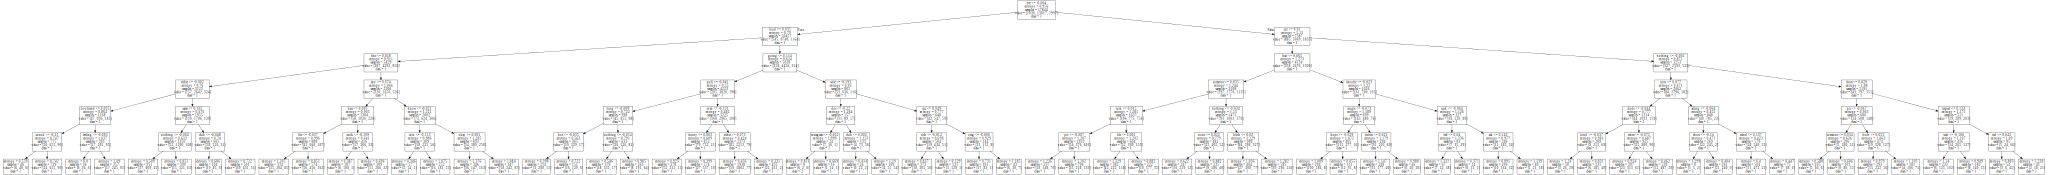

In [84]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(DT_model, out_file=None, 
                                feature_names=data.columns,  
                                class_names=df['class'],
                                filled=False)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## Training RandomForest

In [85]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
        
    # define gridsearch CV
    model = RandomForestClassifier(random_state=42)
    #cv_inner = StratifiedKFold(n_splits=5, random_state=42)
    p_grid = {'n_estimators': [50,100,200],
              'max_depth' : np.arange(2, 200, 5),
              'min_samples_split': np.arange(2, 10),
              'max_features': ['sqrt', 'log2'],
              'criterion' :['gini', 'entropy'],
              
                }
    
    
    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=-1)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


Fold: 1, acc=0.818, Val_Acc: 0.826, est=0.822, cfg={'min_samples_split': 5, 'max_depth': 32, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}
Test_micro_f1: 0.8178333669558201
Test_macro_f1: 0.46799702851161357
Fold: 2, acc=0.815, Val_Acc: 0.820, est=0.824, cfg={'min_samples_split': 4, 'max_depth': 32, 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
Test_micro_f1: 0.8152108129917288
Test_macro_f1: 0.45302699385104334
Fold: 3, acc=0.817, Val_Acc: 0.825, est=0.823, cfg={'min_samples_split': 5, 'max_depth': 37, 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}
Test_micro_f1: 0.8174298971151907
Test_macro_f1: 0.4573941093815537
Fold: 4, acc=0.813, Val_Acc: 0.823, est=0.823, cfg={'min_samples_split': 2, 'max_depth': 17, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50}
Test_micro_f1: 0.8131934637885818
Test_macro_f1: 0.4543374944502238
Fold: 5, acc=0.817, Val_Acc: 0.817, est=0.824, cfg={'min_samples_split': 5, 'max_dept

In [86]:
RF_Model = best_model

In [87]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))


CV vali_accuracy: 0.821 +/- 0.005

CV accuracy: 0.816 +/- 0.002

CV micro F1: 0.816 +/- 0.002

CV macro F1: 0.459 +/- 0.007

---------------------- CLASS : Hate speech Metrics ------------------------

CV Class : Hate speech precision: 0.903 +/- 0.153

CV Class : Hate speech Recall: 0.014 +/- 0.009

CV Class : Hate speech F1 score: 0.027 +/- 0.017

CV Class : Hate speech Support: 286.000 +/- 0.000

---------------------- CLASS : Offensive language Metrics ------------------------

CV Class : Offensive language precision: 0.820 +/- 0.002

CV Class : Offensive language Recall: 0.983 +/- 0.001

CV Class : Offensive language F1 score: 0.894 +/- 0.001

CV Class : Offensive language Support: 3838.000 +/- 0.000

---------------------- CLASS : Neither Metrics ------------------------

CV Class : Neither precision: 0.771 +/- 0.008

CV Class : Neither Recall: 0.323 +/- 0.011

CV Class : Neither F1 score: 0.456 +/- 0.012

CV Class : Neither Support: 833.000 +/- 0.000


In [ ]:
model="RF.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

## Training Multilayer Perceptron

In [ ]:
  
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
        
    # define gridsearch CV
    model = MLPClassifier(random_state=1,max_iter=1000)

    p_grid = { 'solver':['sgd', 'adam'],
               'activation':['logistic', 'tanh', 'relu'],
               'alpha':[0.0001, 0.01, 0.1],
               'hidden_layer_sizes':[(50,),(100,),(150,),(200,)]
             }    
    
    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=20)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


Fold: 1, acc=0.849, Val_Acc: 0.856, est=0.852, cfg={'hidden_layer_sizes': (200,), 'solver': 'sgd', 'activation': 'relu', 'alpha': 0.1}
Test_micro_f1: 0.8486988097639702
Test_macro_f1: 0.5793843521116249
Fold: 2, acc=0.846, Val_Acc: 0.850, est=0.852, cfg={'hidden_layer_sizes': (200,), 'solver': 'sgd', 'activation': 'relu', 'alpha': 0.1}
Test_micro_f1: 0.8458745208795644
Test_macro_f1: 0.5807900974134973
Fold: 3, acc=0.849, Val_Acc: 0.855, est=0.851, cfg={'hidden_layer_sizes': (200,), 'solver': 'sgd', 'activation': 'relu', 'alpha': 0.1}
Test_micro_f1: 0.8486988097639702
Test_macro_f1: 0.5836731941085703
Fold: 4, acc=0.848, Val_Acc: 0.851, est=0.851, cfg={'hidden_layer_sizes': (150,), 'solver': 'sgd', 'activation': 'relu', 'alpha': 0.1}
Test_micro_f1: 0.848093605003026
Test_macro_f1: 0.5831306121933348
Fold: 5, acc=0.845, Val_Acc: 0.855, est=0.851, cfg={'hidden_layer_sizes': (200,), 'solver': 'sgd', 'activation': 'relu', 'alpha': 0.1}
Test_micro_f1: 0.8452693161186201
Test_macro_f1: 0.578

In [ ]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))

In [ ]:
model="MLP.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

## Training Gradient Boosting

In [ ]:
#Define both cross-validation objects (inner & outer)

outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
cm_score = []

rac_precision=[]
rac_recall=[]
rac_f1score=[]
rac_support=[]

se_precision=[]
se_recall=[]
se_f1score=[]
se_support=[]

nei_precision=[]
nei_recall=[]
nei_f1score=[]
nei_support=[]
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
    
    model = GradientBoostingClassifier(random_state=1)
    
    p_grid = {  "learning_rate": [0.001, 0.01,0.1],
                "min_samples_split": np.arange(2, 10),
                "max_depth":np.arange(2, 200, 5),
                "n_estimators": [50, 100, 200],
                }
    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, n_jobs=-1)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    target_names=['Hate speech','Offensive language','neither']
    report = classification_report(y_test, y_pred,target_names=target_names,output_dict=True)
    
    ### individual class metrics
    
    
    rac_precision.append(report['Hate speech']['precision'])
    rac_recall.append(report['Hate speech']['recall'])
    rac_f1score.append(report['Hate speech']['f1-score'])
    rac_support.append(report['Hate speech']['support'])
    
    se_precision.append(report['Offensive language']['precision'])
    se_recall.append(report['Offensive language']['recall'])
    se_f1score.append(report['Offensive language']['f1-score'])
    se_support.append(report['Offensive language']['support'])
    
    nei_precision.append(report['neither']['precision'])
    nei_recall.append(report['neither']['recall'])
    nei_f1score.append(report['neither']['f1-score'])
    nei_support.append(report['neither']['support'])
    
    
    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    cm_score.append(cm)
          
    print('Fold:%2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_F1)
    print('Test_macro_f1:', macro_F1)
    
    #report = classification_report(y_test, y_pred,target_names=target_names)
    
    #print(report)


In [ ]:
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))
print('\nCV micro F1: %.3f +/- %.3f' % (np.mean(micro_f1), np.std(micro_f1)))
print('\nCV macro F1: %.3f +/- %.3f' % (np.mean(macro_f1), np.std(macro_f1)))

print("\n---------------------- CLASS : Hate speech Metrics ------------------------")

print('\nCV Class : Hate speech precision: %.3f +/- %.3f' % (np.mean(rac_precision), np.std(rac_precision)))
print('\nCV Class : Hate speech Recall: %.3f +/- %.3f' % (np.mean(rac_recall), np.std(rac_recall)))
print('\nCV Class : Hate speech F1 score: %.3f +/- %.3f' % (np.mean(rac_f1score), np.std(rac_f1score)))
print('\nCV Class : Hate speech Support: %.3f +/- %.3f' % (np.mean(rac_support), np.std(rac_support)))

print("\n---------------------- CLASS : Offensive language Metrics ------------------------")

print('\nCV Class : Offensive language precision: %.3f +/- %.3f' % (np.mean(se_precision), np.std(se_precision)))
print('\nCV Class : Offensive language Recall: %.3f +/- %.3f' % (np.mean(se_recall), np.std(se_recall)))
print('\nCV Class : Offensive language F1 score: %.3f +/- %.3f' % (np.mean(se_f1score), np.std(se_f1score)))
print('\nCV Class : Offensive language Support: %.3f +/- %.3f' % (np.mean(se_support), np.std(se_support)))

print("\n---------------------- CLASS : Neither Metrics ------------------------")

print('\nCV Class : Neither precision: %.3f +/- %.3f' % (np.mean(nei_precision), np.std(nei_precision)))
print('\nCV Class : Neither Recall: %.3f +/- %.3f' % (np.mean(nei_recall), np.std(nei_recall)))
print('\nCV Class : Neither F1 score: %.3f +/- %.3f' % (np.mean(nei_f1score), np.std(nei_f1score)))
print('\nCV Class : Neither Support: %.3f +/- %.3f' % (np.mean(nei_support), np.std(nei_support)))

In [ ]:
model="GBT.csv"
filename=technique+"_"+model
print(filename)

lr_op=[]

lr_op=[accuracy,micro_f1,macro_f1,rac_precision,rac_recall,rac_f1score,rac_support,\
       se_precision,se_recall,se_f1score,se_support,\
      se_precision,nei_recall,nei_f1score,nei_support]

lr_op=np.array(lr_op).T

print(lr_op.shape)

lr_df=pd.DataFrame(lr_op,columns=["accuracy","microF1","macro F1",\
                                  "Hate speech-Precision","Hate speech-Recall","Hate speech-F1score","Hate speech-Support",\
                                 "Offensive language-Precision","Offensive language-Recall","Offensive language-F1score","Offensive language-Support",\
                                 "Neither-Precision","Neither-Recall","Neither-F1score","Neither-Support"])
lr_df.to_csv(filename,index=True)
lr_df.head()

In [ ]:
# t_test = pd.DataFrame(t_test_tfidf_accuracy_gds,columns = ['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10',])
# res_metrics = pd.DataFrame(tfidf_result_metrics_gds, columns = ['accuracy','micro_f1','macro_f1'])#,'Specificity','Precision','Sensitivity'])

# t_test.to_csv('t_test_tfidf_accuracy_10fold_grid_cv.csv', index = False)
# res_metrics.to_csv('tfidf_result_metrics_10fold_grid_cv.csv', index = False)

# Training Naive Bayes

In [33]:
t_test_tfidf_accuracy_gds = []

In [34]:
  
#Define both cross-validation objects (inner & outer)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
vali_scores = []
accuracy = []
micro_f1 = []
macro_f1 = []
#precision_score = []
#specificity_score = []
#sensitivity_score = []

#writing a loop for nested 10-fold cross-validation & parameter tuning
    
for k,(train, test) in enumerate(outer_cv.split(X_train, y_train)):
        
    # define gridsearch CV
    model = GaussianNB()
    #cv_inner = StratifiedKFold(n_splits=5, random_state=42)
    p_grid = [
      {'var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5]
       }]
    
    clf = GridSearchCV(estimator = model, param_grid=p_grid, scoring='f1_micro',
                       refit=True, cv=inner_cv, n_jobs=-1)
    # fitting model on parameter search
    gd_search = clf.fit(X_train[train], y_train[train])

    # Validating model which is trained parameter search "inner_cv".
    score = gd_search.score(X_train[test], y_train[test])
    vali_scores.append(score)

    # get the best performing model fit on the whole training set
    best_model = gd_search.best_estimator_
    
    best_param = gd_search.best_params_
    # evaluate model on the hold out dataset
    y_pred = best_model.predict(X_test)

    # model "accuracy score" from ground truth and predicted values 
    acc = accuracy_score(y_test, y_pred)
 
    # micro_F1, marco_F1 
    report = classification_report(y_test, y_pred)

    # Since it is multiclass classification printing "micro_F1_score"
    micro_F1 = f1_score(y_test, y_pred, average='micro')

    # Since it is multiclass classification printing "macro_F1_score"
    macro_F1 = f1_score(y_test, y_pred, average='macro')

    # taking "confusion metrics" from true and predicted values
    cm = confusion_matrix(y_test, y_pred)               ## Confusion Matrix
    # To caluculate sensitivity and specifcity individually we can use this
    #tn, fp, fn, tp = cm.ravel()

    # specificity which is "True negative rate"
    # "classification report" gives precision, recall(sensitivity(TP rate)),
    #specificity = np.round(tn / (tn + fp), 3)       # Specificty
    #sensitivity = np.round(tp / (tp + fn), 3)       # Sensitivity
    #precision = np.round(tp / (tp + fp), 3)         #precision
    
    #appending all metrics to list
    accuracy.append(acc)
    micro_f1.append(micro_F1)
    macro_f1.append(macro_F1)
    #precision_score.append(precision)
    #specificity_score.append(specificity)
    #sensitivity_score.append(sensitivity)
          
    print('Fold: %2d, acc=%.3f, Val_Acc: %.3f, est=%.3f, cfg=%s' % (k+1,
                            acc, score, gd_search.best_score_, gd_search.best_params_))
    print('Test_micro_f1:', micro_f1)

    print(report)
    
# summarize the estimated performance of the model            
print('\nCV vali_accuracy: %.3f +/- %.3f' % (np.mean(vali_scores), np.std(vali_scores)))
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(accuracy), np.std(accuracy)))

Fold:  1, acc=0.547, Val_Acc: 0.554, est=0.559, cfg={'var_smoothing': 1e-09}
Test_micro_f1: [0.5469033689731693]
              precision    recall  f1-score   support

           0       0.12      0.43      0.18       286
           1       0.91      0.52      0.67      3838
           2       0.34      0.69      0.46       833

    accuracy                           0.55      4957
   macro avg       0.46      0.55      0.43      4957
weighted avg       0.77      0.55      0.60      4957

Fold:  2, acc=0.573, Val_Acc: 0.581, est=0.588, cfg={'var_smoothing': 1e-09}
Test_micro_f1: [0.5469033689731693, 0.5729271736937664]
              precision    recall  f1-score   support

           0       0.14      0.44      0.21       286
           1       0.91      0.55      0.69      3838
           2       0.34      0.70      0.46       833

    accuracy                           0.57      4957
   macro avg       0.46      0.57      0.45      4957
weighted avg       0.77      0.57      0.62    

In [35]:
mx = micro_f1.index(max(micro_f1))
print('Accuracy:',(accuracy[mx]))
print('micro_f1:',micro_f1[mx])
print('macro_f1:',macro_f1[mx])
#print('Specificity:',specificty_score[mx])
#print('Precision:',precision_score[mx])
#print('Sensitivity:',sensitivity_score[mx])


tfidf_result_metrics_gds.append([accuracy[mx], micro_f1[mx], macro_f1[mx]]) 
                                 #specificty_score[mx], precision_score[mx], sensitivity_score[mx]])

Accuracy: 0.5729271736937664
micro_f1: 0.5729271736937664
macro_f1: 0.45349805780145996


NameError: name 'tfidf_result_metrics_gds' is not defined